<table style="width:100%; float:center; background-color:#FFFFFF" align="left">
<tr>
<td style="text-align:left; background-color:#FFFFFF"></td>
<td style="text-align:right; background-color:#FFFFFF"><div>
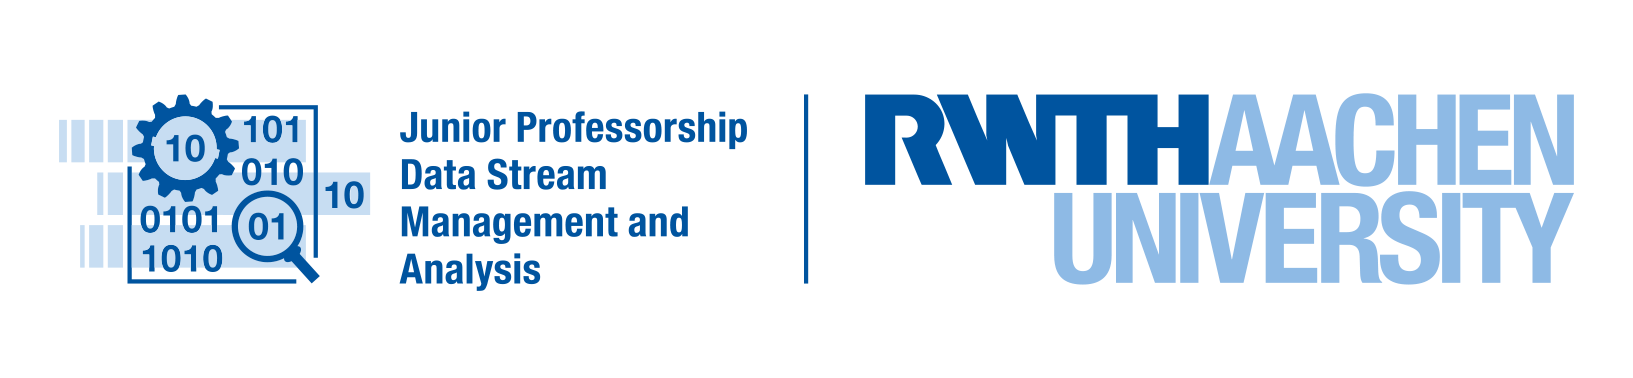
    
</div>
</td></tr>
</table>

Prof. Dr. Sandra Geisler <br>
Soo-Yon Kim, Liam Tirpitz

November 14, 2022

<center>

<h1> Implementation of Databases <br />(Winter Term 2022/2023)</h1>
    
<h1> Exercise 3</h1>
    
</center>

---
**Due until Monday, November 28 at 23:59.
Please submit your solutions as a Jupyter notebook to Moodle.
Please do _not_ submit handwritten solutions!  
Please submit your solutions in groups of three.**
Solutions to this exercise will be presented on Friday, December 2.

---

### Group members: [Name, matriculation number], [name, matriculation number], [name, matriculation number]  
#### Insert all group members by double-clicking on this cell.

---

## Exercise 3.1: Tableau (10 points)

### Construction

Let $R$ be a relation of attributes A, B and C. Given is a query in relational algebra:
$\Pi_{A,B}(R) \bowtie \Pi_{B,C}(\Pi_{A,C}(\sigma_{B=1}(R)) \bowtie \Pi_{A,B}(R))$
1. Translate the RA query into an equivalent DRC query. (2 pts)
2. Construct and equivalent tableau of the query. (1 pts)

### Containment and Minimization

Given the following tableaux $T_1$, $T_2$ and $T_3$.



| $T_1$ |    |    |     |   | $T_2$ |    |    |     |   | $T_3$ |    |    |     |
|----|----|----|-----|---|----|----|----|-----|---|----|----|----|-----|
|    | a1 | a2 |     |   |    | a1 | a2 |     |   |    | a1 | a2 |     |
|    | b3 | a2 | (R) |   |    | b4 | a2 | (R) |   |    | b3 | a2 | (R) |
|    | a1 | b4 | (R) |   |    | b1 | a2 | (R) |   |    | a1 | b2 | (R) |
|    | 5  | b3 | (R) |   |    | a1 | b3 | (R) |   |    | b4 | b1 | (R) |
|    | b4 | 5  | (R) |   |    | b2 | b4 | (R) |   |    | b1 | b2 | (R) |
|    |    |    |     |   |    | b2 | b1 | (R) |   |    | b2 | b3 | (R) |
|    |    |    |     |   |    | b3 | b2 | (R) |   |    | b1 | b3 | (R) |

1. Determine if $T_i \subseteq T_j$ for $i \neq j,\ i,\ j \in \{1,2,3\}$. (6 pts)
2. Write down the minimal tableau for $T_3$. (1 pts)
<br/><br/>

### [ Please replace this text with your answer. ]

## Exercise 3.2: Structure-based Query Optimization (5 points)

Consider the following relational schema and SQL query. The schema captures information about Playlist, PlaylistTrack and Track.<br>
&nbsp;&nbsp;&nbsp;&nbsp;$Playlist(\underline{PlaylistId},\ Name)$,<br/>
&nbsp;&nbsp;&nbsp;&nbsp;$PlaylistTrack\left(\underline{PlaylistId,\ TrackID}\right)$ <br/>
&nbsp;&nbsp;&nbsp;&nbsp;$Track\left(\underline{TrackId},Name,Milliseconds\right)$ <br/>
<br/><br/>
``` sql
SELECT T.Name
FROM Playlist P, PlaylistTrack Q, Track T
WHERE P.PlaylistId=Q.PlaylistId AND T.TrackId=Q.TrackId AND
P.name=’Sport’ AND T.Milliseconds <= 180000 AND
Q.TrackId < 800
```

Draw the resultant relational algebra tree along with the relational algebra expression that reflects the order of operations a decent query optimizer would choose (applying the heuristics selection before join, and projections are done as many and as early as possible). Upload the tree as a comprehensibly named PNG file (e.g. E03-GXXX-ratree.png). **Please note down the RA expression equivalent to the RA tree in the answer field below.** (5 pts)


### [ Please replace this text with your answer. ]

## Exercise 3.3: Cost Estimation (5 points)

Given is a relational schema with three relations $R(A,B)$, $S(B,C)$, and $T(C,D)$.  

1\. The query to be computed is the join of the three relations $R$, $S$, and $T$. Why would a 'smart' query optimizer not choose to join $R$ and $T$ first?  
2\. The following statistical information is given:  
- $|R| = |S| = |T| =$ 1.000.000 tuples  
- A page can hold 100 tuples of $R$, 10 tuples of $S$, or 10 tuples of $T$.
- The selectivity of the join condition is  
$F(R.B = S.B) = 10^{-8}$  
$F(S.C = T.C) = 10^{-6}$  

Compute the sizes of $R \bowtie S$, $S \bowtie T$, $R \bowtie T$, and $R \bowtie S \bowtie T$ in tuples.

1. 
This is because R and T do not have any columns in common, and so, in order to do the join, it would have to calculate the whole cartesian product. On the other hand, if we first join R with S, and then the resultant table with T, we will simply have 2 natural joins, which is much more efficient than the cartesian product.
2.
Join(R,S) = |R| * |S| * 𝐹(𝑅.𝐵=𝑆.𝐵) = 10^12 * 10^-8 = 10^4 tuples
Join(S,T) = |S| * |T| * 𝐹(𝑆.𝐶=𝑇.𝐶) = 10^12 * 10^-6 = 10^6 tuples
Join(R,T) = 10^12 tuples
Join(R,S,T) = |R| * |S| * |T| * 𝐹(𝑅.𝐵=𝑆.𝐵) * 𝐹(𝑆.𝐶=𝑇.𝐶) = 10^18 * 10^-14 = 10^4 tuples

## Exercise 3.4: Selectivity  (4 points)


Consider the following SQL Query $Q$:

``` sql
SELECT * FROM "Track" WHERE ("Milliseconds" > 400 000 AND "Composer" IS NOT NULL) OR ("GenreId" IN (3,13));
```
with the following, statistical data:

- T(Track)=3000
- V(Track,Composer)=850
- V(Track, Milliseconds) = 3000
- Max(Track, Milliseconds) = 5 000 000
- Min(Track, Milliseconds) = 1000
- V(Track, GenreId) = 25
- |GenreId| = 25

Assume there are indices on Milliseconds, Composer and GenreId.
Estimate $T(Q)$ based on the statistical data.

F(Milliseconds) = (5 000 000 - 400 000)/(5 000 000 - 1 000) = 0.9202
F(Composer) = 1 - 1/V(Track,Composer) = 1 - 1/(850) = 0.9988
F(Milliseconds,Composer) = 0.9202 * 0.9988 = 0.9191
F(GenreId) = min(|10| * F(col=GenreId), ½) = min(|10| * 1/V(Track,GenreId), ½) = min(0.4, 0.5) = 0.4
F(Total) = 0.4 + 0.9191 - 0.4 * 0.9191 = 0.9515
Estimate T(Q) = 0.9515 * 3000 = 2854.38

## Exercise 3.5: Short Questions (6 points)

1\. For the operations and indexes given below, provide the cost, and - in your own words - an explanation of the cost.
- Equality selection using a clustered tree index.  
- Insert operation using an unclustered hash index.  

2\. You are about to create an index on a relation. Note down all considerations you can think of that would guide your choice of index.  
- Clustered versus unclustered indexes.  
- Hash versus tree indexes.  

### [ Please replace this text with your answer. ]